# Learning Rate Scheduler
- 학습률(Learning Rate)을 학습 과정 중에 동적으로 조정하기 위한 도구
- 학습률은 모델 학습의 핵심 하이퍼파라미터로, 적절히 조정하지 않으면 학습이 너무 느리거나, 불안정하거나, 수렴하지 못할 수 있음
- Learning Rate Scheduler를 사용하면 학습 과정에서 학습률을 체계적으로 변화시켜 학습 성능을 최적화할 수 있음

## 사용하는 이유
- 빠른 수렴
> 학습 초기에 더 큰 학습률로 시작해 빠르게 학습하도록 하고, 이후 점차 학습률을 줄여 최적화 성능을 높일 수 있음
- 안정적인 학습
> 학습 후반부에 학습률을 낮추면 글로벌 최소점에 안정적으로 수렴할 수 있음

# PyTorch의 Learning Rate Scheduler
- `torch.optim.lr_scheduler` 모듈에서 제공
- Pytorch의 Learning Rate Scheduler 클래스는 첫번째 인수로 optimizer 객체를 전달 받는다.


In [1]:
import torch

# StepLR 클래스
- 지정된 step_size마다 학습률을 감소시키는 방식
- 주요 파라미터
    - step_size: 학습률 감소 주기(일반적으로 에폭 수만큼)
    - gamma: 학습률 감소 비율

In [6]:
def train_loop(model, optimizer):
    for batch in range(10):
        # optimizer.zero_grad()
        # loss.backward()
        optimizer.step()

In [13]:
import matplotlib.pyplot as plt

In [22]:
model = torch.nn.Linear(10, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

lr_list = []
for epoch in range(10): # 에폭 반복
    train_loop(model, optimizer)
    lr_list.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

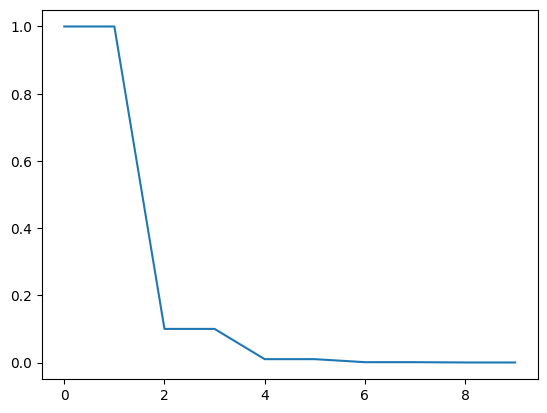

In [23]:
plt.plot(lr_list)
plt.show()

# MultiStepLR 클래스
- 여러 특정 시점에서 학습률을 감소시키는 방식
- 주요파라미터
    - milestones: 학습률을 변경할 epoch 리스트
    - gamma: 학습률 감소 비율

In [25]:
optimizer = torch.optim.Adam(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5, 7], gamma=0.1)

lr_list = []
for epoch in range(10): # 에폭 반복
    train_loop(model, optimizer)
    lr_list.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

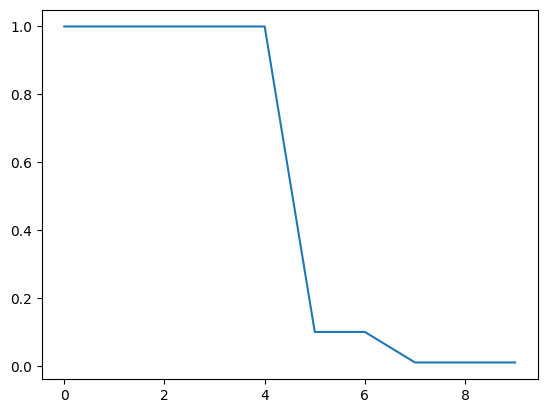

In [26]:
plt.plot(lr_list)
plt.show()

# ExponentialLR 클래스
- 매 epoch마다 학습률을 지수적으로 감소시키는 방식
- gamma: 감소 비율

In [31]:
optimizer = torch.optim.Adam(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)

lr_list = []
for epoch in range(10): # 에폭 반복
    train_loop(model, optimizer)
    lr_list.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

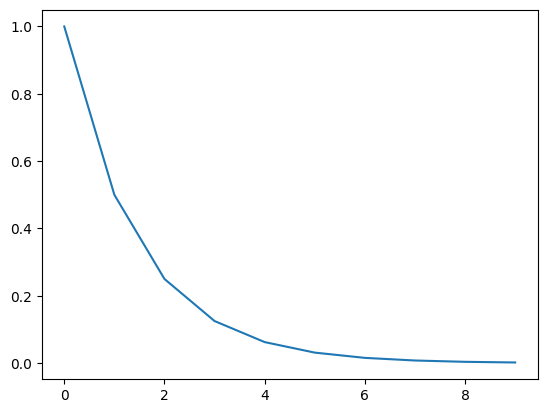

In [32]:
plt.plot(lr_list)
plt.show()

# CosineAnnealingLR 클래스
- 학습률을 Cosine 함수에 따라 진동하도록 조정
- 주요 파라미터
    - T_max: 학습률이 진동 주기를 완성하는 epoch 수

In [37]:
optimizer = torch.optim.Adam(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20)

lr_list = []
for epoch in range(100): # 에폭 반복
    train_loop(model, optimizer)
    lr_list.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

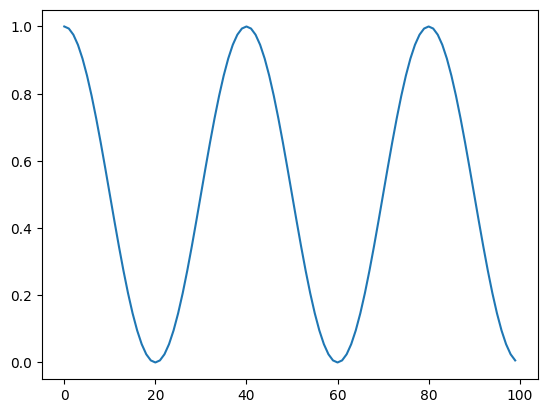

In [38]:
plt.plot(lr_list)
plt.show()

# ReduceLROnPlateau 클래스
- Validation Loss나 Metric이 더 이상 개선되지 않을 때 학습률을 감소시키는 방식
- 주요파라미터
    - mode: 'min' or 'max' 전달
    - factor: 학습률 감소 비율
    - patience: 학습률 감소까지 대기하는 epoch 수

In [45]:
optimizer = torch.optim.Adam(model.parameters(), lr=1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=3, mode="min")

lr_list = []
for epoch in range(100): # 에폭 반복
    train_loop(model, optimizer)
    lr_list.append(optimizer.param_groups[0]["lr"])
    score = 1
    scheduler.step(score) # loss 또는 평가점수를 첫 번째 인수로 전달

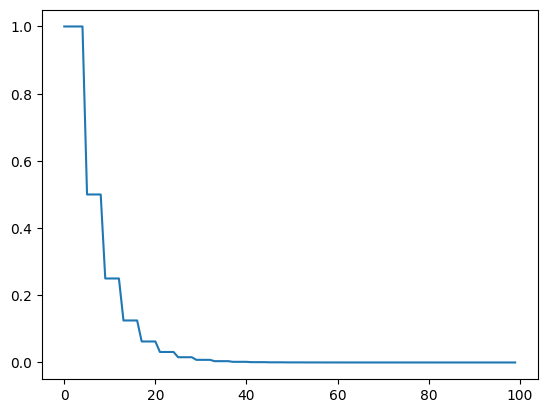

In [46]:
plt.plot(lr_list)
plt.show()